Download the data and prepare the data files for later steps.

In [ ]:
import os
import shutil
import pandas as pd

In [ ]:
!pip install kaggle

In [ ]:
%cd /content/drive/MyDrive/THESIS/

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/THESIS/"

In [ ]:
!kaggle datasets download -d bwandowando/ukraine-russian-crisis-twitter-dataset-1-2-m-rows

In [ ]:
!unzip "/content/drive/MyDrive/THESIS/ukraine-russian-crisis-twitter-dataset-1-2-m-rows.zip" -d "/content/drive/MyDrive/THESIS/data"

In [ ]:
# move all files to main folder
source_folder = r"/content/drive/MyDrive/THESIS/data/UkraineWar/UkraineWar/"
destination_folder = r"/content/drive/MyDrive/THESIS/data/"

for file_name in os.listdir(source_folder):
    source = source_folder + file_name
    destination = destination_folder + file_name
    if os.path.isfile(source):
        shutil.move(source, destination)
        print('Moved:', file_name)

In [ ]:
# remove empty folders
os.rmdir("/content/drive/MyDrive/THESIS/data/UkraineWar/UkraineWar")
os.rmdir("/content/drive/MyDrive/THESIS/data/UkraineWar/")

In [ ]:
# sort files by date for easier selection later
files_dates= pd.DataFrame()

for n in os.listdir('/content/drive/MyDrive/THESIS/data'):
  if n[0:4].isdigit():
    if n[0:4]=='2023':
      date = n[0:4]+"-"+n[4:6]+"-"+n[6:8]
    else:
      date = "2022-"+n[0:2]+"-"+n[2:4]
  else:
    if n[29:34].isdigit() == False:
      if n[29:32] == "FEB":
        date = "2022-02-"+n[32:34]
      if n[29:32] == "MAR":
        date = "2022-03-"+n[32:34]
    else:
      date = n[28:32]+"-"+n[32:34]+"-"+n[34:36]
  f = '/content/drive/MyDrive/THESIS/data/'+ n
  files_dates = files_dates.append(pd.Series([f, date]), ignore_index=True)

files_dates.columns = ['files', 'date']
files_dates['date'] = pd.to_datetime(files_dates['date'])
files_dates = files_dates.sort_values(by='date', ascending=True)
files_dates = files_dates.reset_index(drop=True)
#files_dates = files_dates.set_index(['date'])
files_dates.to_pickle("/content/drive/MyDrive/THESIS/files_dates.pkl")

In [ ]:
import pandas as pd
files_dates = pd.read_pickle("/content/drive/MyDrive/THESIS/files_dates.pkl")

In [ ]:
# combine files with same date
filenames = list(files_dates[0:2]['files'])
combined_csv = pd.concat([pd.read_csv(f, compression='gzip', low_memory=False)for f in filenames ])
combined_csv.to_csv( "/content/drive/MyDrive/THESIS/20220227_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')

filenames = list(files_dates[2:4]['files'])
combined_csv = pd.concat([pd.read_csv(f, compression='gzip', low_memory=False)for f in filenames ])
combined_csv.to_csv( "/content/drive/MyDrive/THESIS/20220228_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')

# split files with multiple dates
f = files_dates.at[30,'files']
twodates = pd.read_csv(f, compression='gzip', engine='python')
grouped = twodates.groupby(twodates['tweetcreatedts'].str.split().str[0])
grouped.get_group("2022-03-27").to_csv( "/content/drive/MyDrive/THESIS/20220327_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2022-03-28").to_csv( "/content/drive/MyDrive/THESIS/20220328_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')

f = files_dates.at[68,'files']
twodates = pd.read_csv(f, compression='gzip', engine='python')
grouped = twodates.groupby(twodates['tweetcreatedts'].str.split().str[0])
grouped.get_group("2022-05-05").to_csv( "/content/drive/MyDrive/THESIS/20220505_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2022-05-06").to_csv( "/content/drive/MyDrive/THESIS/20220506_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2022-05-07").to_csv( "/content/drive/MyDrive/THESIS/20220507_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')

f = files_dates.at[98,'files']
twodates = pd.read_csv(f, compression='gzip', engine='python')
grouped = twodates.groupby(twodates['tweetcreatedts'].str.split().str[0])
grouped.get_group("2022-06-06").to_csv( "/content/drive/MyDrive/THESIS/20220606_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2022-06-07").to_csv( "/content/drive/MyDrive/THESIS/20220607_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2022-06-08").to_csv( "/content/drive/MyDrive/THESIS/20220608_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')

f = files_dates.at[423,'files']
twodates = pd.read_csv(f, compression='gzip', engine='python')
grouped = twodates.groupby(twodates['tweetcreatedts'].str.split().str[0])
grouped.get_group("2023-04-29").to_csv( "/content/drive/MyDrive/THESIS/20230429_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2023-04-30").to_csv( "/content/drive/MyDrive/THESIS/20230430_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')

f = files_dates.at[424,'files']
twodates = pd.read_csv(f, compression='gzip', engine='python')
grouped = twodates.groupby(twodates['tweetcreatedts'].str.split().str[0])
grouped.get_group("2023-05-01").to_csv( "/content/drive/MyDrive/THESIS/20230501_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2023-05-02").to_csv( "/content/drive/MyDrive/THESIS/20230502_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')

f = files_dates.at[427,'files']
twodates = pd.read_csv(f, compression='gzip', engine='python')
grouped = twodates.groupby(twodates['tweetcreatedts'].str.split().str[0])
grouped.get_group("2023-05-05").to_csv( "/content/drive/MyDrive/THESIS/20230505_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2023-05-06").to_csv( "/content/drive/MyDrive/THESIS/20230506_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2023-05-07").to_csv( "/content/drive/MyDrive/THESIS/20230507_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2023-05-08").to_csv( "/content/drive/MyDrive/THESIS/20230508_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')

f = files_dates.at[430,'files']
twodates = pd.read_csv(f, compression='gzip', engine='python')
grouped = twodates.groupby(twodates['tweetcreatedts'].str.split().str[0])
grouped.get_group("2023-05-11").to_csv( "/content/drive/MyDrive/THESIS/20230511_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2023-05-12").to_csv( "/content/drive/MyDrive/THESIS/20230512_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')

f = files_dates.at[433,'files']
twodates = pd.read_csv(f, compression='gzip', engine='python')
grouped = twodates.groupby(twodates['tweetcreatedts'].str.split().str[0])
grouped.get_group("2023-05-15").to_csv( "/content/drive/MyDrive/THESIS/20230515_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2023-05-16").to_csv( "/content/drive/MyDrive/THESIS/20230516_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')

f = files_dates.at[435,'files']
twodates = pd.read_csv(f, compression='gzip', engine='python')
grouped = twodates.groupby(twodates['tweetcreatedts'].str.split().str[0])
grouped.get_group("2023-05-18").to_csv( "/content/drive/MyDrive/THESIS/20230518_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2023-05-19").to_csv( "/content/drive/MyDrive/THESIS/20230519_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')
grouped.get_group("2023-05-20").to_csv( "/content/drive/MyDrive/THESIS/20230520_UkraineCombinedTweetsDeduped.csv.gzip", compression='gzip')

In [ ]:
files_dates.at[0,'files'] = "/content/drive/MyDrive/THESIS/20220227_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.at[2,'files'] = "/content/drive/MyDrive/THESIS/20220228_UkraineCombinedTweetsDeduped.csv.gzip"

files_dates.at[30,'files'] = "/content/drive/MyDrive/THESIS/20220327_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[30.5] = "2022-03-28 00:00:00", "/content/drive/MyDrive/THESIS/20220328_UkraineCombinedTweetsDeduped.csv.gzip"

files_dates.at[68,'files'] = "/content/drive/MyDrive/THESIS/20220505_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[68.25] = "2022-05-06 00:00:00", "/content/drive/MyDrive/THESIS/20220506_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[68.5] = "2022-05-07 00:00:00", "/content/drive/MyDrive/THESIS/20220507_UkraineCombinedTweetsDeduped.csv.gzip"

files_dates.at[98,'files'] = "/content/drive/MyDrive/THESIS/20220606_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[98.25] = "2022-06-07 00:00:00", "/content/drive/MyDrive/THESIS/20220607_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[98.5] = "2022-06-08 00:00:00", "/content/drive/MyDrive/THESIS/20220608_UkraineCombinedTweetsDeduped.csv.gzip"

files_dates.at[423,'files'] = "/content/drive/MyDrive/THESIS/20230429_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[423.5] = "2023-04-30 00:00:00", "/content/drive/MyDrive/THESIS/20230430_UkraineCombinedTweetsDeduped.csv.gzip"

files_dates.at[424,'files'] = "/content/drive/MyDrive/THESIS/20230501_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[424.5] = "2023-05-02 00:00:00", "/content/drive/MyDrive/THESIS/20230502_UkraineCombinedTweetsDeduped.csv.gzip"

files_dates.at[427,'files'] = "/content/drive/MyDrive/THESIS/20230505_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[427.25] = "2023-05-06 00:00:00", "/content/drive/MyDrive/THESIS/20230506_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[427.5] = "2023-05-07 00:00:00", "/content/drive/MyDrive/THESIS/20230507_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[427.75] = "2023-05-08 00:00:00", "/content/drive/MyDrive/THESIS/20230508_UkraineCombinedTweetsDeduped.csv.gzip"

files_dates.at[430,'files'] = "/content/drive/MyDrive/THESIS/20230511_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[430.5] = "2023-05-12 00:00:00", "/content/drive/MyDrive/THESIS/20230512_UkraineCombinedTweetsDeduped.csv.gzip"

files_dates.at[433,'files'] = "/content/drive/MyDrive/THESIS/20230515_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[433.5] = "2023-05-16 00:00:00", "/content/drive/MyDrive/THESIS/20230516_UkraineCombinedTweetsDeduped.csv.gzip"

files_dates.at[435,'files'] = "/content/drive/MyDrive/THESIS/20230518_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[435.25] = "2023-05-19 00:00:00", "/content/drive/MyDrive/THESIS/20230519_UkraineCombinedTweetsDeduped.csv.gzip"
files_dates.loc[435.5] = "2023-05-20 00:00:00", "/content/drive/MyDrive/THESIS/20230520_UkraineCombinedTweetsDeduped.csv.gzip"

#sort index
files_dates = files_dates.drop([1, 3])
files_dates = files_dates.sort_index().reset_index(drop=True)

files_dates.to_pickle("/content/drive/MyDrive/THESIS/files_final.pkl")

Preprocess the tweets for further analysis

In [ ]:
pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 6.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from tqdm import tqdm
from IPython.lib.display import TextDisplayObject
import re
import html
import os
import numpy as np
import emoji
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import requests

nltk.download('wordnet')
nltk.download('omw-1.4')
lmtzr = WordNetLemmatizer()
# stopwords, imported from MALLET.
stop_words = requests.get('https://raw.githubusercontent.com/mimno/Mallet/master/stoplists/en.txt').text.split()
# because of don't in text, people and world are too generally used, the same goes for standwithukraine and video.
stop_words = stop_words+['don', 'people', 'world', 'standwithukraine', 'video']
files_dates = pd.read_pickle("/content/drive/MyDrive/THESIS/files_final.pkl")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# from https://github.com/dr5hn/countries-states-cities-database
import json

# Opening JSON file
f = open('/content/drive/MyDrive/THESIS/countries+states+cities.json')

# dictionary
data = json.load(f)

In [ ]:
c=list()
#s=list()
for i in range(len(data[232]['states'])):
  #s.append(data[232]['states'][i]['name'])
  cities = data[232]['states'][i]['cities']
  for j in range(len(cities)):
    c.append(cities[j]['name'])

In [ ]:
# oblasts in Ukraine and Chernobyl because it is not really a city, but important.
oblasts = 'Dnipropetrovsk Kharkiv Kyiv Odesa Vinnytsia Donetsk Chernihiv Kamianets-Podilsk Mykolaiv Poltava Zhytomyr Donetsk Kirovohrad Sumy Zaporizhzhia Drohobych Ivano-Frankivsk Lviv Volyn Rivne Tarnopol Chernivtsi Izmail Kherson Zakarpattia Cherkasy Crimea oblast Oblast Chernobyl Chornobyl'.split()

In [ ]:
#important leaders of ukraine including military generals and currency
ukr = ['ukrain', 'zelensk', 'kyiv', 'Reznikov', 'Kuleba', 'Umierov', 'Umerov', 'hryvna', 'hryvnia']

In [ ]:
#important leaders of russia including military generals, wagner and currency
rus = ['russia', 'kremlin', 'putin', 'Shoigu', 'Lavrov', 'peskov', 'wagner', 'Prigozhin', 'ruble', 'rouble']

In [ ]:
weapons = ['himars', 'Bayraktar', 'ATACMS', 'Leopard']

In [ ]:
# other important Ukrainian (former) leaders, russian leaders and wagner leaders.
leaders = "Riabikin Vereshchuk Monastyrsky Gutzeit Lazebna Shkarlet Leshchenko Chernyshov Zaluzhnyi poroshenko turchynov yanukovych Mishustin Utkin Pikalov Gerasimov".split()

In [ ]:
# current ukrainian ministers
ministers = [x.split()[1] for x in "Denys Shmyhal, Yuliia Svyrydenko, Iryna Vereshchuk, Olha Stefanishyna, Mykhailo Fedorov, Oleksandr Kubrakov, Oleh Nemchinov, German Galushchenko, Vadym Huttsait, Oleksandr Kamyshin, Ihor Klymenko, Yulia Laputina, Viktor Liashko, Oksen Lisovyi, Serhii Marchenko, Denys Maliuska, Mykola Solskyi, Ruslan Strilets, Oksana Zholnovych, Rostyslav Karandieiev".split(',')]

In [ ]:
plist = ukr+rus
plist = [p.lower() for p in plist]

In [ ]:
plist2 = weapons+ministers+leaders
plist2 = [p.lower() for p in plist2]

In [ ]:
plist3 = oblasts+c

In [ ]:
spamlist = '|'.join(['amazon', 'now playing', 'nowplaying'])

In [ ]:
# preprocessing for roberta sentiment as prescribed by source
def preprocess(text):
    preprocessed_text = []
    for t in text.split():
        if len(t) > 1:
            t = '@user' if t[0] == '@' and t.count('@') == 1 else t
            t = 'http' if t.startswith('http') else t
        preprocessed_text.append(t)
    return ' '.join(preprocessed_text)

In [ ]:
#preprocessing
for x in tqdm(range(len(files_dates)), position=0, leave=True, desc="PREP", colour='green', ncols=80):
  #if os.path.isfile("/content/drive/MyDrive/THESIS/clean/%s_cleantext.pkl" %str(x)):
  #  continue
  dropw=list()
  date = files_dates.at[x,'date']
  f = files_dates.at[x,'files']
  test = pd.read_csv(f, compression='gzip', engine='python')[['text', 'language', 'location', 'tweetcreatedts', 'followers']]
  test = test[test['language'] == 'en'].reset_index(drop=True)
  test = test.drop_duplicates(subset=['text']).reset_index(drop=True)

  #delete spam that was interfering with the topic results.
  test = test[~test.text.str.lower().str.contains(spamlist)].reset_index(drop=True)

  for i in tqdm(range(len(test)), position=0, desc="TOPIC", leave=True, colour='red', ncols=80):

    text = test.at[i,'text']
    # check most common keywords first to speed things up, then the long list of cities.
    if any(w in text.lower() for w in plist) == False:
      if any(w in text.lower() for w in plist2) == False:
        if any(w in text for w in plist3) == False:
          dropw.append(i)
          continue

    #remove new line + tab
    text = text.replace("\n", ' ')
    text = text.replace("\t", ' ')

    # replace html with unicode
    text = html.unescape(text)

    # because something with % stopped the loop at remove url
    text = re.sub(r'\S+%\S+', '', text)

    #some random typo I saw in a tweet
    if 'Http//' in text:
      text = text.replace('Http//', 'http://')

    # remove mail
    text = re.sub(r"\S+@\S*\s?", '', text)

    # one instance when url and questionmarks are interfering with remove url.
    if 'X?????????????????????????????????????????????????????????????????????????????????????????????????' in text:
      text=text.replace('X?????????????????????????????????????????????????????????????????????????????????????????????????', 'X ?????????????????????????????????????????????????????????????????????????????????????????????????')

    #only for VADER
    #remove url like the groundtruth dataset for vader
    text_v = re.sub(r'(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', 'http://url_removed', text)
    # Replace Twitter Handles like the groundtruth dataset for vader
    text_v = re.sub(r'@[\w]*', '@anonymous', text_v)

    # for topics and flair/textblob
    #remove url
    text = re.sub(r'(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', text)

    # remove emoji
    text = emoji.replace_emoji(text, '')
    # remove words with number in it
    text_f_t = re.sub(r'\w*\d\w*', '', text)
    # to keep it as close as possible to the text used for vader replace user mentions
    text_f_t = re.sub(r'@[\w]*', 'anonymous', text_f_t)
    # remove anything that does not belong in a regular sentence
    text_f_t = re.sub(r"[^a-zA-Z?!., ]",'',text_f_t)
    text_f_t = re.sub(r'\s+', " ", text_f_t).strip()

    # remove mentions and hashtags at the end of sentence because these are usually not important for the true subject
    text = text.strip()
    while re.search('@\S+$', text.strip()) or re.search('#\S+$', text.strip()):
      text = text.strip()
      if re.search('[\.|\!|\?]$', text):
        break
      s = re.findall('#\S+$', text.strip())
      a = re.findall('@\S+$', text.strip())
      if s:
        text = text.replace(s[0], '')
      if a:
        text = text.replace(a[0], '')

    #remove via @...
    pattern = "\s+via\s+@\S+"
    match = re.findall(pattern, text)
    for m in match:
      text = text.replace(m, '')

    #delete string of multiple #
    while re.search('((#\S+(\s+|$)){2,})', text):
      r = re.search('((#\S+(\s+|$)){2,})', text)
      mentions = r.group(1)
      text = text.replace(mentions, '')

    #delete string of multiple @
    while re.search('((@\S+(\s+|$)){2,})', text):
      r = re.search('((@\S+(\s+|$)){2,})', text)
      mentions = r.group(1)
      text = text.replace(mentions, '')

    # delete @ at start of sentence
    text = text.strip()
    while re.search('\A@\S+\s', text.strip()):
      text = text.strip()
      r = re.findall('\A@\S+\s', text)
      if r:
        text = text.replace(r[0], '')

    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(r"[^a-zA-Z ]", " ", text)
    text = re.sub(r'\s+', " ", text)

    text = text.lower().strip()

    text = text.split()
    text = [w for w in text if not len(w) <= 2 or w =='un' or w == 'eu' or w == 'uk' or w == 'ua']
    text = [w for w in text if w not in stop_words]
    text = [lmtzr.lemmatize(w) for w in text]

    text = " ".join(text)

    # because lemmatize replaces states with state
    for m in re.findall("united state\s", text):
      text = text.replace(m, 'united states ')
    for m in re.findall("united state$", text):
      text = text.replace(m, 'united states')

    test.at[i, 'cleantext'] = text
    test.at[i, 'vadertext'] = text_v
    test.at[i, 'flairtext'] = text_f_t

  test= test.drop(dropw, axis='index').reset_index(drop=True)
  test=test.drop_duplicates(subset=['cleantext']).reset_index(drop=True)
  doc_list = [l.split() for l in list(test['cleantext'])]
  test['tokens'] = doc_list
  test = test[test.tokens.map(len)>3].reset_index(drop=True)

  test.to_pickle("/content/drive/MyDrive/THESIS/clean/%s_cleantext.pkl" %str(x))

Run VADER, CIDER and NMF

In [ ]:
pip install ciderpolarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn import decomposition
import gensim
import pandas as pd
import numpy as np
from itertools import combinations
from tqdm import tqdm
from ast import literal_eval
from statistics import multimode
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import random
from flair.data import Sentence
from flair.nn import Classifier
from textblob import TextBlob
from transformers import pipeline
from google.colab.data_table import DataTable
DataTable.max_columns = 100
from collections import Counter

# https://github.com/dlukes/rbo
from drive.MyDrive.rbo import rbo
# load file with info on dates and files
files_dates = pd.read_pickle("/content/drive/MyDrive/THESIS/ultimate_files.pkl")
sid = SentimentIntensityAnalyzer()

In [ ]:
#set seeds
random.seed(123)
np.random.seed(123)

In [ ]:
# the amount of topics is fixed with k=10
k=10

In [ ]:
dates = [str(date)[0:10] for date in files_dates['date']]

In [ ]:
#find average weights of topic words.
for f in files_dates['weights']:
  for d in literal_eval(f):
    try:
      total
    except NameError:
      total=np.array(d[0:10])
    else:
      total = total+np.array(d[0:10])
total_mean=total/(len(files_dates)*10)

In [ ]:
total_mean

array([3.58675487, 0.92695431, 0.62185965, 0.49068405, 0.4092567 ,
       0.35338319, 0.31214525, 0.27961463, 0.25436404, 0.23321616])

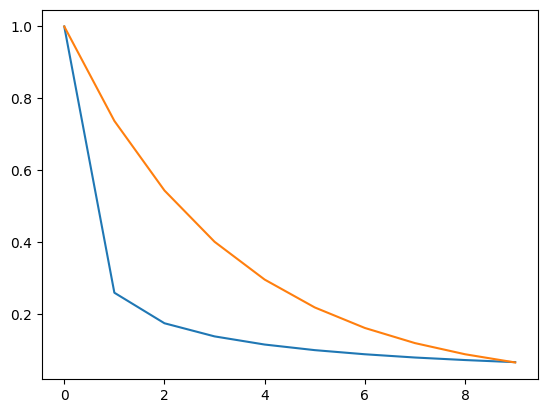

In [ ]:
import matplotlib.pyplot as plt
plt.plot(list(range(10)), list(total_mean/total_mean[0]))
plt.plot(list(range(10)), [0.737**i for i in range(10)])

In [ ]:
# base dataframe
dfl=dict()
dfl['date'] = 'NaN'
for i in range(k):
  dfl['topic_rank%s'%str(i)] = [i]
  dfl['rbo_score%s'%str(i)] = 'NaN'
  dfl['mean_vader%s'%str(i)] = 'NaN'
  dfl['vader_percent%s'%str(i)] = 'NaN'
  dfl['mean_cider_sentiment%s'%str(i)] = 'NaN'
  dfl['mean_cider_intensity%s'%str(i)] = 'NaN'
  dfl['flair_percent%s'%str(i)] = 'NaN'
  dfl['textblob_percent%s'%str(i)] = 'NaN'
  dfl['topic_words%s'%str(i)] = 'NaN'
df = pd.DataFrame(dfl)

In [ ]:
def textblob_label(polarity):
  if polarity>0:
    return 'POSITIVE'
  elif polarity<0:
    return 'NEGATIVE'
  else:
    return 'NEUTRAL'

def vader_label(compound):
  if compound >= 0.05:
    return 'POSITIVE'
  elif compound <= -0.05:
    return 'NEGATIVE'
  else:
    return 'NEUTRAL'

In [ ]:
for x in tqdm(range(len(files_dates)), position=0, leave=True, desc="TOPIC", colour='green', ncols=80):

  # skip the analysed datafiles
  if x < len(df) and len(df)!=1:
    continue

  # open datafile
  test = pd.read_pickle("/content/drive/MyDrive/THESIS/clean/%s_cleantext.pkl" %str(x))

  # the following section of NMF topic modeling uses a modified version of the code found on the following website: https://github.com/nuitrcs/topic-modeling-workshop/tree/master
  tfidf_vectorizer = TfidfVectorizer(min_df=30)
  tfidf = tfidf_vectorizer.fit_transform(test['cleantext'])

  # Apply
  model = decomposition.NMF(solver='mu', init = 'nndsvda', n_components=k )
  W = model.fit_transform( tfidf )
  H = model.components_
  terms = tfidf_vectorizer.get_feature_names_out()


  #choose topic for tweet based on probablities
  #show topic and corresponding probability
  for t in range(len(W)):
    topic = W[t].argmax()
    prob = W[t][W[t].argmax()]
    test.at[t,'topic'] = topic
    test.at[t,'topic_prob'] = prob

  # rearrange the topic position and name based on popularity
  old_order = [i for i in test.value_counts(subset='topic').index.tolist()]
  new_order = [float(i) for i in range(len(old_order))]
  change_topic = {'topic' : dict(zip(old_order, new_order))}
  test = test.replace(change_topic)

  # for every tweet calculate sentiment and save in data file
  for i in tqdm(range(len(test)), position=0, desc="VADER", leave=True, colour='red', ncols=80):
    vader = test.at[i,'vadertext']
    flair = Sentence(test.at[i, 'flairtext'])
    tagger.predict(flair)
    #roberta = test.at[i, 'robertatext']
    v = sid.polarity_scores(vader)
    f = flair.labels[0].value
    tb = TextBlob(test.at[i, 'flairtext']).sentiment.polarity
    #r = senti_score[roberta_model(roberta)[0]['label']]

    test.at[i,'vader_sentiment']=str(v)
    test.at[i, 'vader_label'] = vader_label(v['compound'])
    test.at[i,'flair_label']= f
    test.at[i,'textblob_sentiment']= tb
    test.at[i, 'textblob_label'] = textblob_label(tb)

  # save file
  test.to_pickle("/content/drive/MyDrive/THESIS/clean/%s_cleantext.pkl" %str(x))

  termsl=[]
  weightsl=[]
  for topic_index in range(k):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:10]:
      top_terms.append( terms[term_index] )
      top_weights.append( H[topic_index,term_index] )
    termsl.append(top_terms)
    weightsl.append(top_weights)

  # like before, change the topic order based on rankings so it maches the datafile
  order = [int(i) for i in test.value_counts(subset='topic').index.tolist()]
  termsl = np.asarray(termsl)[order].tolist()
  weightsl = np.asarray(weightsl)[order].tolist()
  files_dates.at[x,'topics']=str(termsl)
  files_dates.at[x,'weights']=str(weightsl)

  #termsl = literal_eval(files_dates.at[x,'topics'])

  coher = []
  if x != 0:
    for i in range(len(prevtop)):
      pr = prevtop[i]
      for j in range(len(termsl)):
        c = termsl[j]
        coher = coher + [[i,j,rbo(pr,c,p=0.737)[2]]]


    l1 = list()
    l2 = list()
    coher = sorted(coher, key=lambda x: x[2], reverse=True)

    for i in coher:
      if i[0] not in l1:
        if i[1] not in l2:
          l1.append(i[0])
          l2.append(i[1])
          p = list(max([df.loc[x-1,['topic_rank'+str(t) for t in range(k)]].eq(i[0])])).index(True)
          df.at[x,'topic_rank'+str(p)]=i[1]
          df.at[x,'rbo_score'+str(p)]=i[2]
          df.at[x,'topic_words'+str(p)]=termsl[i[1]]

  else:
    for i in range(len(termsl)):
      df.at[x,'topic_words'+str(i)]=termsl[i]

  prevtop = termsl
  #add date to df
  df.at[x, 'date']=dates[x]
  # find mean VADER and RoBERTa sentiment for every topic and mode RoBERTa
  overlap = list()
  for i in range(k):
    index = test.index[test['topic'] == i].tolist()
    for j in range(len(index)):
      if j == 0:
        va = np.array(list(literal_eval(test.loc[index[j],'vader_sentiment']).values()))
        vader_labels = [test.loc[index[j],'vader_label']]
        flair_labels = [test.loc[index[j],'flair_label']]
        textblob_labels = [test.loc[index[j],'textblob_label']]
      else:
        va = va + np.array(list(literal_eval(test.loc[index[j],'vader_sentiment']).values()))
        vader_labels.append(test.loc[index[j],'vader_label'])
        flair_labels.append(test.loc[index[j],'flair_label'])
        textblob_labels.append(test.loc[index[j],'textblob_label'])

    # percentage of the positive, negative, neutral labels for the tweets
    vader_percent = dict(zip(list(Counter(vader_labels).keys()), [v/(len(vader_labels))*100 for v in list(Counter(vader_labels).values())]))
    flair_percent  = dict(zip(list(Counter(flair_labels).keys()), [v/(len(flair_labels))*100 for v in list(Counter(flair_labels).values())]))
    textblob_percent = dict(zip(list(Counter(textblob_labels).keys()), [v/(len(textblob_labels))*100 for v in list(Counter(textblob_labels).values())]))


    # calculate the percentage overlap of all sentiment techniques
    sentiment_overlap = {'all_sentiment':sum(len(set(i))==1 for i in zip(vader_labels, flair_labels, textblob_labels))/len(index)*100,
                         'vader_flair':sum(len(set(i))==1 for i in zip(vader_labels, flair_labels))/len(index)*100,
                         'vader_textblob':sum(len(set(i))==1 for i in zip(vader_labels, textblob_labels))/len(index)*100,
                         'flair_textblob':sum(len(set(i))==1 for i in zip(flair_labels, textblob_labels))/len(index)*100}
    overlap.append(sentiment_overlap)

    mean_vader = va/len(index)

    p = list(max([df.loc[x,['topic_rank'+str(t) for t in range(k)]].eq(i)])).index(True)
    df.at[x,'mean_vader'+str(p)] = mean_vader[3]
    df.at[x, 'vader_percent'+str(p)] = vader_percent
    df.at[x, 'flair_percent'+str(p)] = flair_percent
    df.at[x, 'textblob_percent'+str(p)] = textblob_percent

  files_dates.at[x, 'sentiment_overlap'] = str(overlap)
  files_dates.to_pickle("/content/drive/MyDrive/THESIS/ultimate_files.pkl")
  df.to_pickle("/content/drive/MyDrive/THESIS/final_data.pkl")

In [ ]:
def mean_percent(list_of_dictionaries):
  try:
    return dict(zip(['POSITIVE','NEGATIVE','NEUTRAL'],
     [sum([s['POSITIVE'] for s in list_of_dictionaries])/len(list_of_dictionaries),
      sum([s['NEGATIVE'] for s in list_of_dictionaries])/len(list_of_dictionaries),
      sum([s['NEUTRAL'] for s in list_of_dictionaries])/len(list_of_dictionaries)]))
  except:
    KeyError
    return dict(zip(['POSITIVE','NEGATIVE'],
     [sum([s['POSITIVE'] for s in list_of_dictionaries])/len(list_of_dictionaries),
      sum([s['NEGATIVE'] for s in list_of_dictionaries])/len(list_of_dictionaries)]))



In [ ]:
# Make a weighted average of the topics.
# The first word has 10 times more weight than the last.
def averaged_topic(list_of_topics):
  d=dict()
  for topic in list_of_topics:
    c=10
    for word in topic:
      if word in d:
        d[word]=d[word]+c
        c-=1
      else:
        d[word]=c
        c-=1
  d=dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

  return list(d.keys())[0:10]

In [ ]:
import numpy as np
from collections import Counter
# combine topics on first word
def topic_df(first_word, graph=False):
  topic_index = pd.DataFrame()
  t = pd.DataFrame(columns=['date','topic_rank','rbo_score','mean_vader','vader_percent','mean_cider_sentiment','mean_cider_intensity','flair_percent','textblob_percent','topic_words'])
  col_index = {0:[0,1,2,3,4,5,6,7,8,9],1:[0,10,11,12,13,14,15,16,17,18],
             2:[0,19,20,21,22,23,24,25,26,27],3:[0,28,29,30,31,32,33,34,35,36],
             4:[0,37,38,39,40,41,42,43,44,45],5:[0,46,47,48,49,50,51,52,53,54],
             6:[0,55,56,57,58,59,60,61,62,63],7:[0,64,65,66,67,68,69,70,71,72],
             8:[0,73,74,75,76,77,78,79,80,81],9:[0,82,83,84,85,86,87,88,89,90]}
  for x in range(10):
    i = df.index[[s[0]==first_word for s in df['topic_words%s' %str(x)]]].tolist()
    if len(i) > 0:
      for i2 in i:
        topic_index.at[i2,'timeline']=x
  topic_index=topic_index.sort_index()
  for x in range(473):
    try:
      topic_index.loc[x]
      t.loc[len(t)] = list(df.iloc[x, col_index[int(topic_index.loc[x])]])
    except:
      KeyError
      if graph == True:
        t.loc[len(t)] = [np.NaN]*10
  return t

In [ ]:
import plotly.express as px
def graph_senti(topic_df, model='VADER'):
  d={'VADER':4,'TextBlob':8,'Flair':7}
  t=topic_df
  if model == 'Flair':
    y=[[],[]]
    for x in range(len(t)):
      if pd.isna(t.iloc[x,3]) == True:
        y[0].append('NaN')
        y[1].append('NaN')
      else:
        y[0].append(t.iloc[x,d[model]]['POSITIVE'])
        y[1].append(t.iloc[x,d[model]]['NEGATIVE'])
  else:
    y=[[],[],[]]
    for x in range(len(t)):
      if pd.isna(t.iloc[x,3]) == True:
        y[0].append('NaN')
        y[1].append('NaN')
        y[2].append('NaN')
      else:
        y[0].append(t.iloc[x,d[model]]['POSITIVE'])
        y[1].append(t.iloc[x,d[model]]['NEGATIVE'])
        y[2].append(t.iloc[x,d[model]]['NEUTRAL'])

  #x=list(range(len(y[0])))
  x=dates
  fig = px.line(x=x, y=y, title='Sentiment Percentages per Day '+model)
  fig.data[0].name = 'Positive'
  fig.data[1].name = 'Negative'

  fig.data[0].line.color = "#33cc33"
  fig.data[1].line.color = "#ff0000"
  if len(y)==3:
    fig.data[2].name = 'Neutral'
    fig.data[2].line.color = "#ffc800"
  fig.update_yaxes(title=dict(text='Percent'))
  fig.update_xaxes(title=dict(text='Date'))
  fig.update_layout(legend_title_text='Sentiment')
  return fig.show()

In [ ]:
from tqdm import tqdm

for x in tqdm(range(len(files_dates)), position=0, leave=True, desc="TOPIC", colour='green', ncols=80):

  # open datafile
  test = pd.read_pickle("/content/drive/MyDrive/THESIS/clean/%s_cleantext.pkl" %str(x))
  if x==0:
    vl=list(test['vader_label'])
    tl=list(test['textblob_label'])
    cl=list(test['cider_label'])
    fl=list(test['flair_label'])
  else:
    vl+=list(test['vader_label'])
    tl+=list(test['textblob_label'])
    cl+=list(test['cider_label'])
    fl+=list(test['flair_label'])



TOPIC:   5%|█▊                                 | 24/473 [00:33<10:19,  1.38s/it]


KeyboardInterrupt: 

In [ ]:
dfl=dict()
dfl['vader_label']=vl
dfl['textblob_label']=tl
dfl['cider_label']=cl
dfl['flair_label']=fl
topic_sim = pd.DataFrame(dfl)

In [ ]:
topic_sim

,vader_label,textblob_label,cider_label,flair_label
0,NEUTRAL,NEUTRAL,NEUTRAL,NEGATIVE
1,POSITIVE,NEUTRAL,POSITIVE,POSITIVE
2,NEGATIVE,NEUTRAL,NEUTRAL,NEGATIVE
3,NEGATIVE,NEGATIVE,POSITIVE,NEGATIVE
4,NEGATIVE,NEUTRAL,NEGATIVE,NEGATIVE
...,...,...,...,...
9991639,NEGATIVE,NEUTRAL,NEGATIVE,POSITIVE
9991640,NEGATIVE,POSITIVE,POSITIVE,POSITIVE
9991641,NEUTRAL,NEUTRAL,NEUTRAL,NEGATIVE
9991642,NEUTRAL,NEUTRAL,NEUTRAL,POSITIVE


In [ ]:
topic_sim.to_pickle("/content/drive/MyDrive/THESIS/topic_sim.pkl")

In [ ]:
print(dict(zip(list(Counter(vl).keys()), [v/(len(vl))*100 for v in list(Counter(vl).values())])))
print(dict(zip(list(Counter(tl).keys()), [v/(len(tl))*100 for v in list(Counter(tl).values())])))
print(dict(zip(list(Counter(cl).keys()), [v/(len(cl))*100 for v in list(Counter(cl).values())])))
print(dict(zip(list(Counter(fl).keys()), [v/(len(fl))*100 for v in list(Counter(fl).values())])))

In [ ]:
sentiment_overlap = {'all_sentiment':sum(len(set(i))==1 for i in zip(vl, fl, tl))/len(vl)*100,
                     'vader_flair':sum(len(set(i))==1 for i in zip(vl, fl))/len(vl)*100,
                     'vader_textblob':sum(len(set(i))==1 for i in zip(vl, tl))/len(vl)*100,
                     'flair_textblob':sum(len(set(i))==1 for i in zip(fl, tl))/len(fl)*100}

In [ ]:
#calculate similarity in sentiment labels
def topic_similarity(vader, y):
  d={"POSPOS":0,"POSNEG":0,"POSNEU":0,"NEGNEG":0,"NEGPOS":0,"NEGNEU":0,"NEUNEU":0,"NEUPOS":0,"NEUNEG":0}
  for s in range(len(vader)):
    if vader[s]=="POSITIVE":
      if y[s]=="POSITIVE":
        d["POSPOS"] = d["POSPOS"]+1
      elif y[s]=="NEGATIVE":
        d["POSNEG"] = d["POSNEG"]+1
      else:
        d["POSNEU"] = d["POSNEU"]+1
    elif vader[s]=="NEGATIVE":
      if y[s]=="NEGATIVE":
        d["NEGNEG"] = d["NEGNEG"]+1
      elif y[s]=="POSITIVE":
        d["NEGPOS"] = d["NEGPOS"]+1
      else:
        d["NEGNEU"] = d["NEGNEU"]+1
    else:
      if y[s]=="NEUTRAL":
        d["NEUNEU"] = d["NEUNEU"]+1
      elif y[s]=="POSITIVE":
        d["NEUPOS"] = d["NEUPOS"]+1
      else:
        d["NEUNEG"] = d["NEUNEG"]+1
  return d

In [ ]:
d=topic_similarity(vl,cl)

In [ ]:
d

{'POSPOS': 2898063,
 'POSNEG': 265633,
 'POSNEU': 161929,
 'NEGNEG': 3961150,
 'NEGPOS': 475873,
 'NEGNEU': 396134,
 'NEUNEU': 1414035,
 'NEUPOS': 216145,
 'NEUNEG': 202682}

In [ ]:
dict(zip(list(d.keys()), [v/sum(d.values())*100 for v in list(d.values())]))

{'POSPOS': 25.358380699472054,
 'POSNEG': 5.571015379501499,
 'POSNEU': 9.831896476704488,
 'NEGNEG': 22.06907844822916,
 'NEGPOS': 19.188121462247672,
 'NEGNEU': 17.981507533845125,
 'NEUNEU': 0.0,
 'NEUPOS': 0.0,
 'NEUNEG': 0.0}

In [ ]:
print('positive')
print(d['POSPOS']/(d['POSPOS']+d['POSNEG']+d['POSNEU'])*100)
print(d['POSNEG']/(d['POSPOS']+d['POSNEG']+d['POSNEU'])*100)
print(d['POSNEU']/(d['POSPOS']+d['POSNEG']+d['POSNEU'])*100)
print('negative')
print(d['NEGPOS']/(d['NEGNEG']+d['NEGPOS']+d['NEGNEU'])*100)
print(d['NEGNEG']/(d['NEGNEG']+d['NEGPOS']+d['NEGNEU'])*100)
print(d['NEGNEU']/(d['NEGNEG']+d['NEGPOS']+d['NEGNEU'])*100)
print('neutral')
print(d['NEUPOS']/(d['NEUNEU']+d['NEUPOS']+d['NEUNEG'])*100)
print(d['NEUNEG']/(d['NEUNEU']+d['NEUPOS']+d['NEUNEG'])*100)
print(d['NEUNEU']/(d['NEUNEU']+d['NEUPOS']+d['NEUNEG'])*100)


positive
87.1434091336215
7.987461003570758
4.8691298628077435
negative
9.846007485376536
81.9578176334847
8.196174881138766
neutral
11.792759083880838
11.058224787245303
77.14901612887385


In [ ]:
sentiment_overlap

{'all_sentiment': 26.69316480851399,
 'vader_flair': 52.571458710898824,
 'vader_textblob': 48.71903962951442,
 'flair_textblob': 39.648430228298764}

In [ ]:
test=pd.read_pickle("/content/drive/MyDrive/THESIS/clean/4_cleantext.pkl")
dict(zip(list(Counter(vl).keys()), [v/(len(vl))*100 for v in list(Counter(vl).values())]))
[c/len(test)*100 for c in dict(Counter(list(test['flair_label']))).values()]

[57.41502149963905, 42.58497850036094]

In [ ]:
# average topic sentiment

pv = list(df['vader_percent0'])
for x in range(1,10):
  pv += list(df['vader_percent%s' %str(x)])
mean_percent(pv)

{'POSITIVE': 30.57350085376501,
 'NEGATIVE': 50.84100399899882,
 'NEUTRAL': 18.58549514723627}

In [ ]:
pv = list(df['textblob_percent0'])
for x in range(1,10):
  pv += list(df['textblob_percent%s' %str(x)])
mean_percent(pv)

{'POSITIVE': 39.975812907365444,
 'NEGATIVE': 26.389811699924003,
 'NEUTRAL': 33.634375392710574}

In [ ]:
pv = list(df['flair_percent0'])
for x in range(1,10):
  pv += list(df['flair_percent%s' %str(x)])
mean_percent(pv)

{'POSITIVE': 41.68730106485693, 'NEGATIVE': 58.3126989351429}

In [ ]:
files_dates['sentiment_overlap'][0]

"[{'all_sentiment': 28.13008629426036, 'vader_flair': 51.54316248502903, 'vader_textblob': 52.12971777784602, 'flair_textblob': 39.50803058686239}, {'all_sentiment': 22.126072361059308, 'vader_flair': 49.71279373368146, 'vader_textblob': 45.96419246549795, 'flair_textblob': 34.595300261096604}, {'all_sentiment': 27.821100917431192, 'vader_flair': 52.683486238532105, 'vader_textblob': 51.563455657492355, 'flair_textblob': 39.99617737003058}, {'all_sentiment': 22.21814006888634, 'vader_flair': 49.327210103329506, 'vader_textblob': 46.902411021814004, 'flair_textblob': 35.118254879448905}, {'all_sentiment': 23.499586092715234, 'vader_flair': 56.60182119205298, 'vader_textblob': 37.40169701986755, 'flair_textblob': 38.97454470198676}, {'all_sentiment': 19.872912332002475, 'vader_flair': 42.65309565315189, 'vader_textblob': 45.55474329415734, 'flair_textblob': 36.068154979474784}, {'all_sentiment': 26.908806873657486, 'vader_flair': 51.38319338670833, 'vader_textblob': 49.63874243311853, 'f

In [ ]:
# ukraine topic graphs
t = topic_df('ukraine',True)

In [ ]:
graph_senti(t,'VADER')

In [ ]:
graph_senti(t,'TextBlob')

In [ ]:
graph_senti(t,'Flair')

In [ ]:
# Filter out all topics that do not include "support" or "stand".

c=list()
for x in t['topic_words']:
  try:
    if 'support' in x or 'stand' in x :
      c.append(True)
    else:
      c.append(False)
  except:
    TypeError
    c.append(False)

for x in range(len(c)):
  if c[x]==False:
    t.loc[x] = [t.at[x,'date']] + [np.NaN]*9

In [ ]:
graph_senti(t,'VADER')

In [ ]:
graph_senti(t,'TextBlob')

In [ ]:
graph_senti(t,'Flair')

In [ ]:
# ukraine topic semtiments
t = topic_df('ukraine',False)

In [ ]:
len(t)

417

In [ ]:
print(mean_percent(t['vader_percent']))
print(mean_percent(t['textblob_percent']))
print(mean_percent(t['flair_percent']))

{'POSITIVE': 40.406086023147004, 'NEGATIVE': 39.858478639826444, 'NEUTRAL': 19.735435337026598}
{'POSITIVE': 44.90276986563216, 'NEGATIVE': 22.97075810266668, 'NEUTRAL': 32.126472031701184}
{'POSITIVE': 44.85678689720961, 'NEGATIVE': 55.14321310279044}


In [ ]:
averaged_topic(t['topic_words'])

['ukraine',
 'support',
 'invasion',
 'weapon',
 'country',
 'day',
 'nato',
 'military',
 'news',
 'aid']

In [ ]:
# how many days negative above 50%
c=0
for x in t['vader_percent']:
  if x['NEGATIVE'] > 50:
    c+=1
print("Negative sentiment above 50% " + str(c/len(t)*100) + "% of the time,")
print("or "+ str(c) +" times.")

Negative sentiment above 50% 18.683651804670912% of the time,
or 88 times.


In [ ]:
Counter(t['topic_rank'])

Counter({0.0: 304, 4.0: 29, 6.0: 4, 5.0: 6, 2.0: 23, 1.0: 86, 3.0: 18, 7.0: 1})

In [ ]:
# Filter out all topics that do not include "support" or "stand".

c=list()
for x in t['topic_words']:
  if 'support' in x or 'stand' in x :
    c.append(True)
  else:
    c.append(False)

for x in range(len(c)):
  if c[x]==False:
    t=t.drop([x], axis='index')
t=t.reset_index()

In [ ]:
len(t)

In [ ]:
print(mean_percent(t['vader_percent']))
print(mean_percent(t['textblob_percent']))
print(mean_percent(t['flair_percent']))

In [ ]:
averaged_topic(t['topic_words'])

In [ ]:
# how many days negative above 50%
c=0
for x in t['vader_percent']:
  if x['NEGATIVE'] > 50:
    c+=1
print("Negative sentiment above 50% " + str(c/len(t)*100) + "% of the time,")
print("or "+ str(c) +" times.")

In [ ]:
Counter(t['topic_rank'])

In [ ]:
t = topic_df('russian',True)
graph_senti(t,'VADER')

In [ ]:
graph_senti(t,'TextBlob')

In [ ]:
graph_senti(t,'Flair')

In [ ]:
t = topic_df('russian',False)

In [ ]:
len(t)

469

In [ ]:
print(mean_percent(t['vader_percent']))
print(mean_percent(t['textblob_percent']))
print(mean_percent(t['flair_percent']))

{'POSITIVE': 33.70124501465213, 'NEGATIVE': 46.63702632219985, 'NEUTRAL': 19.661728663147965}
{'POSITIVE': 41.35465577797336, 'NEGATIVE': 25.258305031627934, 'NEUTRAL': 33.387039190398724}
{'POSITIVE': 40.90671710883921, 'NEGATIVE': 59.09328289116076}


In [ ]:
averaged_topic(t['topic_words'])

['russian',
 'soldier',
 'army',
 'troop',
 'military',
 'tank',
 'destroyed',
 'force',
 'missile',
 'region']

In [ ]:
c=0
for x in t['vader_percent']:
  if x['NEGATIVE'] > 50:
    c+=1
print("Negative sentiment above 50% " + str(c/len(t)*100) + "% of the time,")
print("or "+ str(c) +" times.")

Negative sentiment above 50% 33.90191897654584% of the time,
or 159 times.


In [ ]:
Counter(t['topic_rank'])

Counter({1.0: 257,
         3.0: 25,
         2.0: 60,
         0.0: 66,
         6.0: 16,
         7.0: 7,
         5.0: 8,
         4.0: 18,
         8.0: 8,
         9.0: 4})

In [ ]:
print(Counter(['force' in s or 'military' in s or 'soldier' in s or 'tank'
               in s or 'troop' in s or 'army' in s for s in t['topic_words']]))

Counter({True: 468, False: 1})


In [ ]:
['force' in s or 'military' in s or 'soldier' in s or 'tank' in s or 'troop' in s or 'army' in s for s in t['topic_words']].index(False)

178

In [ ]:
print(t.iloc[178]['date'])
print(t.iloc[178]['topic_words'])

2022-08-24
['russian', 'region', 'station', 'attack', 'killed', 'missile', 'dnipropetrovsk', 'railway', 'train', 'injured']


In [ ]:
t = topic_df('war',True)
graph_senti(t,'VADER')

In [ ]:
graph_senti(t,'TextBlob')

In [ ]:
graph_senti(t,'Flair')

In [ ]:
t = topic_df('war',False)

In [ ]:
len(t)

462

In [ ]:
print(mean_percent(t['vader_percent']))
print(mean_percent(t['textblob_percent']))
print(mean_percent(t['flair_percent']))

{'POSITIVE': 26.742482777015137, 'NEGATIVE': 56.13981689324594, 'NEUTRAL': 17.117700329738952}
{'POSITIVE': 39.15563635384821, 'NEGATIVE': 27.08387632014507, 'NEUTRAL': 33.76048732600674}
{'POSITIVE': 41.4925687663608, 'NEGATIVE': 58.5074312336392}


In [ ]:
averaged_topic(t['topic_words'])

['war',
 'crime',
 'end',
 'criminal',
 'stop',
 'russiawar',
 'footage',
 'day',
 'win',
 'peace']

In [ ]:
# how many days negative above 50%
c=0
for x in t['vader_percent']:
  if x['NEGATIVE'] > 50:
    c+=1
print("Negative sentiment above 50% " + str(c/len(t)*100) + "% of the time,")
print("or "+ str(c) +" times.")

Negative sentiment above 50% 58.44155844155844% of the time,
or 270 times.


In [ ]:
t = topic_df('putin',True)
graph_senti(t,'VADER')

In [ ]:
graph_senti(t,'TextBlob')

In [ ]:
graph_senti(t,'Flair')

In [ ]:
t = topic_df('putin',False)

In [ ]:
len(t)

461

In [ ]:
print(mean_percent(t['vader_percent']))
print(mean_percent(t['textblob_percent']))
print(mean_percent(t['flair_percent']))

{'POSITIVE': 29.390768023030724, 'NEGATIVE': 52.294013102428345, 'NEUTRAL': 18.315218874540935}
{'POSITIVE': 39.73215460631043, 'NEGATIVE': 26.800959573550266, 'NEUTRAL': 33.46688582013926}
{'POSITIVE': 39.59552843220683, 'NEGATIVE': 60.40447156779315}


In [ ]:
averaged_topic(t['topic_words'])

['putin',
 'vladimir',
 'president',
 'trump',
 'stop',
 'time',
 'biden',
 'fuck',
 'west',
 'leader']

In [ ]:
# how many days negative above 50%
c=0
for x in t['vader_percent']:
  if x['NEGATIVE'] > 50:
    c+=1
print("Negative sentiment above 50% " + str(c/len(t)*100) + "% of the time,")
print("or "+ str(c) +" times.")

Negative sentiment above 50% 52.27765726681128% of the time,
or 241 times.


In [ ]:
Counter(t['topic_rank'])

Counter({3.0: 142,
         2.0: 92,
         4.0: 87,
         1.0: 9,
         5.0: 60,
         7.0: 13,
         6.0: 31,
         0.0: 1,
         9.0: 19,
         8.0: 7})

In [ ]:
t = topic_df('russia',True)
graph_senti(t,'VADER')

In [ ]:
graph_senti(t,'TextBlob')

In [ ]:
graph_senti(t,'Flair')

In [ ]:
t = topic_df('russia',False)

In [ ]:
len(t)

472

In [ ]:
print(mean_percent(t['vader_percent']))
print(mean_percent(t['textblob_percent']))
print(mean_percent(t['flair_percent']))

{'POSITIVE': 32.11523806737709, 'NEGATIVE': 49.34397164668591, 'NEUTRAL': 18.540790285937003}
{'POSITIVE': 41.11200426539755, 'NEGATIVE': 25.81934723435428, 'NEUTRAL': 33.06864850024816}
{'POSITIVE': 41.563367482399656, 'NEGATIVE': 58.43663251760036}


In [ ]:
averaged_topic(t['topic_words'])

['russia',
 'china',
 'sanction',
 'country',
 'state',
 'nato',
 'invasion',
 'west',
 'terrorist',
 'iran']

In [ ]:
# how many days negative above 50%
c=0
for x in t['vader_percent']:
  if x['NEGATIVE'] > 50:
    c+=1
print("Negative sentiment above 50% " + str(c/len(t)*100) + "% of the time,")
print("or "+ str(c) +" times.")

Negative sentiment above 50% 40.67796610169492% of the time,
or 192 times.


In [ ]:
Counter(t['topic_rank'])

Counter({4.0: 61,
         0.0: 54,
         5.0: 16,
         6.0: 3,
         3.0: 150,
         7.0: 1,
         2.0: 171,
         1.0: 16})

In [ ]:
t = topic_df('ukrainian',True)
graph_senti(t,'VADER')

In [ ]:
graph_senti(t,'TextBlob')

In [ ]:
graph_senti(t,'Flair')

In [ ]:
t = topic_df('ukrainian',False)

In [ ]:
len(t)

451

In [ ]:
print(mean_percent(t['vader_percent']))
print(mean_percent(t['textblob_percent']))
print(mean_percent(t['flair_percent']))

{'POSITIVE': 28.078505823915215, 'NEGATIVE': 54.315047508767094, 'NEUTRAL': 17.606446667317687}
{'POSITIVE': 39.432310677846466, 'NEGATIVE': 26.784310004839856, 'NEUTRAL': 33.78337931731365}
{'POSITIVE': 41.703741767943384, 'NEGATIVE': 58.296258232056566}


In [ ]:
averaged_topic(t['topic_words'])

['ukrainian',
 'soldier',
 'army',
 'force',
 'troop',
 'military',
 'child',
 'refugee',
 'nazi',
 'position']

In [ ]:
# how many days negative above 50%
c=0
for x in t['vader_percent']:
  if x['NEGATIVE'] > 50:
    c+=1
print("Negative sentiment above 50% " + str(c/len(t)*100) + "% of the time,")
print("or "+ str(c) +" times.")

Negative sentiment above 50% 54.32372505543237% of the time,
or 245 times.


In [ ]:
Counter(t['topic_rank'])

Counter({5.0: 134,
         7.0: 63,
         6.0: 138,
         8.0: 31,
         1.0: 18,
         4.0: 43,
         3.0: 2,
         9.0: 6,
         0.0: 11,
         2.0: 5})

In [ ]:
# find topic based on first word, linked trough RBO

topic_finder = pd.DataFrame(columns=['first_word','timeline','start','stop','lenght'])
j=0
for i in range(10):
  c=0
  for x in range(len(df)-1):
    if x<c:
      continue
    if df.at[x,'topic_words%s' %str(i)][0]==df.at[x+1,'topic_words%s' %str(i)][0]:
      word=df.at[x,'topic_words%s' %str(i)][0]
      start = x
      c = x
      while df.at[c,'topic_words%s' %str(i)][0]==word:
        c+=1
        if c == 472:
          c+=1
          break

      topic_finder.loc[len(topic_finder)]= [word,i,start,c-1,c-start]



In [ ]:
# find topics that remain for 14 or more days
d=dict()
for x in topic_finder.index[topic_finder['lenght'] > 14].tolist():
  if topic_finder.loc[x]["first_word"] in d:
    d[topic_finder.loc[x]["first_word"]]=d[topic_finder.loc[x]["first_word"]]+topic_finder.loc[x]["lenght"]
  else:
    d[topic_finder.loc[x]["first_word"]]=topic_finder.loc[x]["lenght"]

In [ ]:
#slightly adjusted for the other graphs
import plotly.express as px
def graph_senti(topic_df, model='VADER'):
  d={'VADER':4,'TextBlob':8,'Flair':7}
  t=topic_df
  if model == 'Flair':
    y=[[],[]]
    for x in range(len(t)):
      if pd.isna(t.iloc[x,3]) == True:
        y[0].append('NaN')
        y[1].append('NaN')
      else:
        y[0].append(t.iloc[x,d[model]]['POSITIVE'])
        y[1].append(t.iloc[x,d[model]]['NEGATIVE'])
  else:
    y=[[],[],[]]
    for x in range(len(t)):
      if pd.isna(t.iloc[x,3]) == True:
        y[0].append('NaN')
        y[1].append('NaN')
        y[2].append('NaN')
      else:
        y[0].append(t.iloc[x,d[model]]['POSITIVE'])
        y[1].append(t.iloc[x,d[model]]['NEGATIVE'])
        y[2].append(t.iloc[x,d[model]]['NEUTRAL'])

  #x=list(range(len(y[0])))
  x=topic_df['date']
  fig = px.line(x=x, y=y, title='Sentiment Percentages per Day '+model)
  fig.data[0].name = 'Positive'
  fig.data[1].name = 'Negative'

  fig.data[0].line.color = "#33cc33"
  fig.data[1].line.color = "#ff0000"
  if len(y)==3:
    fig.data[2].name = 'Neutral'
    fig.data[2].line.color = "#ffc800"
  fig.update_yaxes(title=dict(text='Percent'))
  fig.update_xaxes(title=dict(text='Date'))
  fig.update_layout(legend_title_text='Sentiment')
  return fig.show()

In [ ]:
topic_finder

,first_word,timeline,start,stop,lenght
0,ukraine,0,0,325,326
1,military,0,326,327,2
2,force,0,328,330,3
3,tank,0,331,346,16
4,force,0,348,349,2
...,...,...,...,...,...
380,putin,9,442,443,2
381,force,9,444,447,4
382,ukrainian,9,449,463,15
383,dam,9,464,467,4


In [ ]:
d

{'ukraine': 471,
 'tank': 16,
 'war': 422,
 'russian': 469,
 'bakhmut': 95,
 'putin': 444,
 'russia': 472,
 'ukrainian': 418,
 'zelensky': 25,
 'mariupol': 19}

In [ ]:
topic_finder.loc[topic_finder.index[topic_finder['first_word'] == 'bakhmut'].tolist()]

,first_word,timeline,start,stop,lenght
61,bakhmut,1,415,463,49
62,bakhmut,1,465,468,4
98,bakhmut,2,301,303,3
104,bakhmut,2,335,337,3
138,bakhmut,4,286,289,4
144,bakhmut,4,313,318,6
191,bakhmut,5,279,280,2
255,bakhmut,6,349,350,2
260,bakhmut,6,387,413,27
290,bakhmut,7,343,346,4


In [ ]:
topic_finder.loc[topic_finder.index[topic_finder['first_word'] == 'mariupol'].tolist()]

,first_word,timeline,start,stop,lenght
65,mariupol,2,72,76,5
67,mariupol,2,80,81,2
68,mariupol,2,83,84,2
266,mariupol,7,17,26,10
267,mariupol,7,28,34,7
320,mariupol,8,47,65,19
339,mariupol,9,43,44,2
345,mariupol,9,67,70,4


In [ ]:
#graphs bakhmut topic
t=df.iloc[364:382+1, [0,64,65,66,67,68,69,70,71,72]]

In [ ]:
graph_senti(t,'VADER')

In [ ]:
t

,date,topic_rank7,rbo_score7,mean_vader7,vader_percent7,mean_cider_sentiment7,mean_cider_intensity7,flair_percent7,textblob_percent7,topic_words7
364,2023-02-26,7.0,0.0,-0.089604,"{'NEGATIVE': 45.86153045288912, 'NEUTRAL': 21....",-0.164604,0.628584,"{'NEGATIVE': 51.483602290473705, 'POSITIVE': 4...","{'NEUTRAL': 33.8365434669443, 'NEGATIVE': 25.7...","[bakhmut, force, wagner, city, battle, footage..."
365,2023-02-27,7.0,0.907789,-0.466494,"{'NEGATIVE': 80.64965197215777, 'POSITIVE': 14...",-0.334046,0.828626,"{'POSITIVE': 49.651972157772626, 'NEGATIVE': 5...","{'POSITIVE': 40.696055684454755, 'NEGATIVE': 2...","[bakhmut, force, wagner, armed, city, group, b..."
366,2023-02-28,4.0,0.730519,0.0234,"{'NEGATIVE': 38.929577464788736, 'POSITIVE': 4...",0.013875,0.592594,"{'NEGATIVE': 58.53521126760563, 'POSITIVE': 41...","{'POSITIVE': 45.23943661971831, 'NEGATIVE': 25...","[bakhmut, wagner, city, battle, force, situati..."
367,2023-03-01,1.0,0.797275,0.130559,"{'POSITIVE': 50.89285714285714, 'NEGATIVE': 29...",0.116281,0.563254,"{'POSITIVE': 51.686507936507944, 'NEGATIVE': 4...","{'POSITIVE': 47.354497354497354, 'NEUTRAL': 33...","[bakhmut, force, wagner, city, battle, troop, ..."
368,2023-03-02,6.0,0.794765,-0.165751,"{'NEGATIVE': 51.93753614806247, 'POSITIVE': 24...",-0.159701,0.547222,"{'NEGATIVE': 67.72700983227298, 'POSITIVE': 32...","{'NEUTRAL': 35.280508964719495, 'POSITIVE': 37...","[bakhmut, wagner, city, battle, troop, force, ..."
369,2023-03-03,3.0,0.907967,-0.457717,"{'NEGATIVE': 78.98812596799173, 'POSITIVE': 13...",-0.487359,0.77169,"{'NEGATIVE': 51.93598347960764, 'POSITIVE': 48...","{'NEGATIVE': 24.367578729994836, 'NEUTRAL': 34...","[bakhmut, wagner, city, group, troop, battle, ..."
370,2023-03-04,1.0,0.923924,-0.129624,"{'NEGATIVE': 50.57232049947971, 'POSITIVE': 32...",-0.153473,0.566112,"{'POSITIVE': 36.00416233090531, 'NEGATIVE': 63...","{'NEGATIVE': 27.471383975026015, 'NEUTRAL': 32...","[bakhmut, wagner, city, battle, troop, group, ..."
371,2023-03-05,1.0,0.972179,0.098608,"{'POSITIVE': 46.71076809996325, 'NEGATIVE': 31...",0.102174,0.561541,"{'NEGATIVE': 50.64314590224183, 'POSITIVE': 49...","{'NEGATIVE': 19.331128261668503, 'NEUTRAL': 32...","[bakhmut, wagner, city, battle, troop, group, ..."
372,2023-03-06,2.0,0.869308,-0.226557,"{'NEGATIVE': 57.910321489001696, 'POSITIVE': 2...",-0.208329,0.547179,"{'POSITIVE': 45.558375634517766, 'NEGATIVE': 5...","{'NEGATIVE': 27.79187817258883, 'POSITIVE': 35...","[bakhmut, wagner, force, battle, city, troop, ..."
373,2023-03-07,3.0,0.865732,-0.167322,"{'NEGATIVE': 52.08845208845209, 'POSITIVE': 26...",-0.166014,0.507895,"{'NEGATIVE': 54.88943488943489, 'POSITIVE': 45...","{'NEUTRAL': 37.98525798525799, 'POSITIVE': 38....","[bakhmut, force, wagner, battle, city, armed, ..."


In [ ]:
print(mean_percent(t['vader_percent7']))
print(mean_percent(t['textblob_percent7']))
print(mean_percent(t['flair_percent7']))

{'POSITIVE': 28.065112517697827, 'NEGATIVE': 53.540026536236475, 'NEUTRAL': 18.394860946065684}
{'POSITIVE': 38.42244211755409, 'NEGATIVE': 27.519075967571744, 'NEUTRAL': 34.05848191487418}
{'POSITIVE': 42.8598982365751, 'NEGATIVE': 57.1401017634249}


In [ ]:
averaged_topic(t['topic_words7'])

['bakhmut',
 'wagner',
 'battle',
 'city',
 'troop',
 'group',
 'force',
 'footage',
 'horrible',
 'fighting']

In [ ]:
# how many days negative above 50%
c=0
for x in t['vader_percent7']:
  if x['NEGATIVE'] > 50:
    c+=1
print("Negative sentiment above 50% " + str(c/len(t)*100) + "% of the time,")
print("or "+ str(c) +" times.")

Negative sentiment above 50% 63.1578947368421% of the time,
or 12 times.


In [ ]:
Counter(t['topic_rank7'])

Counter({7.0: 2, 4.0: 1, 1.0: 3, 6.0: 4, 3.0: 5, 2.0: 2, 5.0: 1, 8.0: 1})

In [ ]:
t=df.iloc[387:413+1, [0,55,56,57,58,59,60,61,62,63]]

In [ ]:
graph_senti(t,'VADER')

In [ ]:
t

,date,topic_rank6,rbo_score6,mean_vader6,vader_percent6,mean_cider_sentiment6,mean_cider_intensity6,flair_percent6,textblob_percent6,topic_words6
387,2023-03-21,6.0,0.012842,-0.313096,"{'POSITIVE': 17.423133235724745, 'NEGATIVE': 6...",-0.354529,0.611658,"{'POSITIVE': 46.705710102489014, 'NEGATIVE': 5...","{'NEUTRAL': 36.53001464128843, 'NEGATIVE': 33....","[bakhmut, wagner, footage, troop, group, battl..."
388,2023-03-22,6.0,0.865599,-0.243086,"{'POSITIVE': 21.299397186872067, 'NEGATIVE': 5...",-0.213509,0.537831,"{'POSITIVE': 48.894842598794376, 'NEGATIVE': 5...","{'NEUTRAL': 36.503683858004024, 'NEGATIVE': 30...","[bakhmut, footage, wagner, troop, force, battl..."
389,2023-03-23,5.0,0.843226,-0.162078,"{'NEGATIVE': 49.87293519695044, 'NEUTRAL': 26....",-0.17807,0.516057,"{'NEGATIVE': 66.83608640406608, 'POSITIVE': 33...","{'NEUTRAL': 38.81829733163914, 'NEGATIVE': 28....","[bakhmut, wagner, footage, troop, group, horri..."
390,2023-03-24,5.0,0.881284,-0.470098,"{'POSITIVE': 15.255292652552926, 'NEGATIVE': 7...",-0.510184,0.796363,"{'POSITIVE': 48.318804483188046, 'NEGATIVE': 5...","{'POSITIVE': 38.85429638854296, 'NEUTRAL': 34....","[bakhmut, footage, wagner, troop, group, horri..."
391,2023-03-25,4.0,0.878168,-0.450651,"{'NEGATIVE': 79.0228013029316, 'NEUTRAL': 5.92...",-0.080857,0.522253,"{'NEGATIVE': 52.18241042345277, 'POSITIVE': 47...","{'NEUTRAL': 35.960912052117266, 'POSITIVE': 38...","[bakhmut, wagner, footage, troop, group, battl..."
392,2023-03-26,6.0,0.887711,-0.327454,"{'NEGATIVE': 65.93776282590412, 'POSITIVE': 15...",-0.360437,0.589876,"{'NEGATIVE': 50.3784693019344, 'POSITIVE': 49....","{'NEUTRAL': 34.90328006728343, 'NEGATIVE': 36....","[bakhmut, footage, wagner, troop, group, battl..."
393,2023-03-27,5.0,0.878168,-0.09025,"{'POSITIVE': 33.08625336927224, 'NEGATIVE': 47...",-0.12684,0.573797,"{'POSITIVE': 35.37735849056604, 'NEGATIVE': 64...","{'POSITIVE': 38.67924528301887, 'NEGATIVE': 28...","[bakhmut, wagner, footage, troop, group, horri..."
394,2023-03-28,5.0,0.899202,-0.203351,"{'POSITIVE': 23.495883470550982, 'NEGATIVE': 5...",-0.198037,0.516849,"{'NEGATIVE': 68.1443951868271, 'POSITIVE': 31....","{'POSITIVE': 32.99556681443952, 'NEGATIVE': 29...","[bakhmut, footage, wagner, troop, group, horri..."
395,2023-03-29,5.0,0.70547,-0.27924,"{'POSITIVE': 19.579751671442217, 'NEGATIVE': 6...",-0.287988,0.580276,"{'POSITIVE': 46.32282712511939, 'NEGATIVE': 53...","{'NEUTRAL': 34.28844317096466, 'NEGATIVE': 33....","[bakhmut, wagner, group, battle, city, fightin..."
396,2023-03-30,5.0,0.811344,-0.08053,"{'NEGATIVE': 46.484375, 'POSITIVE': 34.2447916...",-0.06028,0.554924,"{'NEGATIVE': 49.93489583333333, 'POSITIVE': 50...","{'POSITIVE': 39.58333333333333, 'NEUTRAL': 36....","[bakhmut, wagner, troop, footage, group, horri..."


In [ ]:
print(mean_percent(t['vader_percent6']))
print(mean_percent(t['textblob_percent6']))
print(mean_percent(t['flair_percent6']))

{'POSITIVE': 24.947256836910203, 'NEGATIVE': 59.1810720059908, 'NEUTRAL': 15.87167115709901}
{'POSITIVE': 36.64568423007184, 'NEGATIVE': 28.280425568916122, 'NEUTRAL': 35.073890201012034}
{'POSITIVE': 42.682640651446114, 'NEGATIVE': 57.3173593485539}


In [ ]:
averaged_topic(t['topic_words6'])

['bakhmut',
 'wagner',
 'footage',
 'troop',
 'group',
 'battle',
 'horrible',
 'city',
 'force',
 'mercenary']

In [ ]:
# how many days negative above 50%
c=0
for x in t['vader_percent6']:
  if x['NEGATIVE'] > 50:
    c+=1
print("Negative sentiment above 50% " + str(c/len(t)*100) + "% of the time,")
print("or "+ str(c) +" times.")

Negative sentiment above 50% 62.96296296296296% of the time,
or 17 times.


In [ ]:
Counter(t['topic_rank6'])

Counter({6.0: 6, 5.0: 8, 4.0: 3, 0.0: 1, 3.0: 8, 2.0: 1})

In [ ]:
t=df.iloc[415:463+1, [0,10,11,12,13,14,15,16,17,18]]

In [ ]:
graph_senti(t,'VADER')

In [ ]:
t

,date,topic_rank1,rbo_score1,mean_vader1,vader_percent1,mean_cider_sentiment1,mean_cider_intensity1,flair_percent1,textblob_percent1,topic_words1
415,2023-04-18,4.0,0.0,-0.093846,"{'NEGATIVE': 45.58359621451104, 'NEUTRAL': 24....",-0.060831,0.485249,"{'NEGATIVE': 55.36277602523659, 'POSITIVE': 44...","{'NEUTRAL': 35.01577287066246, 'NEGATIVE': 28....","[bakhmut, battle, footage, city, troop, loss, ..."
416,2023-04-19,4.0,0.680192,-0.362113,"{'POSITIVE': 15.822002472187885, 'NEGATIVE': 6...",-0.274132,0.518395,"{'POSITIVE': 46.22991347342398, 'NEGATIVE': 53...","{'NEUTRAL': 32.509270704573545, 'NEGATIVE': 39...","[bakhmut, wagner, footage, troop, group, horri..."
417,2023-04-20,4.0,0.989702,-0.157125,"{'NEGATIVE': 48.25090470446321, 'POSITIVE': 22...",-0.115651,0.418163,"{'NEGATIVE': 65.2593486127865, 'POSITIVE': 34....","{'POSITIVE': 31.966224366706875, 'NEGATIVE': 2...","[bakhmut, wagner, footage, troop, group, horri..."
418,2023-04-21,3.0,0.901156,-0.359386,"{'NEGATIVE': 69.1817215727949, 'POSITIVE': 12....",-0.321282,0.534365,"{'NEGATIVE': 51.64718384697131, 'POSITIVE': 48...","{'NEUTRAL': 39.53241232731137, 'NEGATIVE': 35....","[bakhmut, wagner, group, troop, footage, battl..."
419,2023-04-22,3.0,0.901156,-0.496498,"{'NEGATIVE': 82.74111675126903, 'POSITIVE': 11...",-0.119307,0.512044,"{'NEGATIVE': 50.888324873096444, 'POSITIVE': 4...","{'NEUTRAL': 37.18274111675127, 'NEGATIVE': 25....","[bakhmut, wagner, footage, troop, group, horri..."
420,2023-04-23,4.0,0.878179,-0.164004,"{'NEGATIVE': 49.04270986745213, 'NEUTRAL': 24....",-0.083285,0.412336,"{'NEGATIVE': 52.43004418262151, 'POSITIVE': 47...","{'POSITIVE': 34.75699558173785, 'NEUTRAL': 40....","[bakhmut, footage, wagner, troop, group, battl..."
421,2023-04-24,3.0,0.884595,-0.36876,"{'POSITIVE': 12.955032119914348, 'NEGATIVE': 6...",-0.219825,0.423081,"{'POSITIVE': 48.92933618843683, 'NEGATIVE': 51...","{'NEUTRAL': 38.22269807280514, 'POSITIVE': 24....","[bakhmut, wagner, footage, troop, group, horri..."
422,2023-04-25,3.0,0.960838,-0.542955,"{'NEGATIVE': 84.7769028871391, 'POSITIVE': 3.6...",-0.393551,0.475069,"{'POSITIVE': 36.48293963254593, 'NEGATIVE': 63...","{'NEUTRAL': 32.54593175853018, 'POSITIVE': 15....","[bakhmut, wagner, footage, group, troop, horri..."
423,2023-04-26,2.0,0.910687,-0.227671,"{'NEGATIVE': 54.54545454545454, 'NEUTRAL': 27....",-0.160034,0.391595,"{'POSITIVE': 38.80266075388026, 'NEGATIVE': 61...","{'NEGATIVE': 29.268292682926827, 'NEUTRAL': 40...","[bakhmut, wagner, troop, footage, group, horri..."
424,2023-04-27,2.0,0.522301,-0.145543,"{'NEGATIVE': 46.900269541778975, 'POSITIVE': 2...",-0.100476,0.390373,"{'NEGATIVE': 49.32614555256065, 'POSITIVE': 50...","{'NEUTRAL': 46.36118598382749, 'POSITIVE': 33....","[bakhmut, city, battle, building, fighting, fo..."


In [ ]:
print(mean_percent(t['vader_percent1']))
print(mean_percent(t['textblob_percent1']))
print(mean_percent(t['flair_percent1']))

{'POSITIVE': 20.684771707822556, 'NEGATIVE': 59.274771244680664, 'NEUTRAL': 20.040457047496762}
{'POSITIVE': 32.33307494480253, 'NEGATIVE': 27.805286748684708, 'NEUTRAL': 39.86163830651275}
{'POSITIVE': 43.91090011351395, 'NEGATIVE': 56.08909988648606}


In [ ]:
averaged_topic(t['topic_words1'])

['bakhmut',
 'wagner',
 'battle',
 'city',
 'group',
 'footage',
 'force',
 'fighting',
 'troop',
 'prigozhin']

In [ ]:
# how many days negative above 50%
c=0
for x in t['vader_percent1']:
  if x['NEGATIVE'] > 50:
    c+=1
print("Negative sentiment above 50% " + str(c/len(t)*100) + "% of the time,")
print("or "+ str(c) +" times.")

Negative sentiment above 50% 77.55102040816327% of the time,
or 38 times.


In [ ]:
Counter(t['topic_rank1'])

Counter({4.0: 7,
         3.0: 10,
         2.0: 24,
         0.0: 2,
         1.0: 1,
         5.0: 2,
         7.0: 1,
         6.0: 1,
         8.0: 1})

In [ ]:
# find topics
d=dict()
for x in range(len(topic_finder)):
  if topic_finder.loc[x]["first_word"] in d:
    d[topic_finder.loc[x]["first_word"]]=d[topic_finder.loc[x]["first_word"]]+topic_finder.loc[x]["lenght"]
  else:
    d[topic_finder.loc[x]["first_word"]]=topic_finder.loc[x]["lenght"]

In [ ]:
d=dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

In [ ]:
topic_finder.index[topic_finder['first_word'] == 'tank'].tolist()

[3, 100, 111, 247, 262, 281, 287, 297, 331, 369]

In [ ]:
import numpy as np
from collections import Counter
# combine topics on first 3 words for bucha example
def topic_df(word, graph=False):
  topic_index = pd.DataFrame()
  t = pd.DataFrame(columns=['date','topic_rank','rbo_score','mean_vader','vader_percent','mean_cider_sentiment','mean_cider_intensity','flair_percent','textblob_percent','topic_words'])
  col_index = {0:[0,1,2,3,4,5,6,7,8,9],1:[0,10,11,12,13,14,15,16,17,18],
             2:[0,19,20,21,22,23,24,25,26,27],3:[0,28,29,30,31,32,33,34,35,36],
             4:[0,37,38,39,40,41,42,43,44,45],5:[0,46,47,48,49,50,51,52,53,54],
             6:[0,55,56,57,58,59,60,61,62,63],7:[0,64,65,66,67,68,69,70,71,72],
             8:[0,73,74,75,76,77,78,79,80,81],9:[0,82,83,84,85,86,87,88,89,90]}
  for x in range(10):
    i = df.index[[word in s[0:3] for s in df['topic_words%s' %str(x)]]].tolist()
    if len(i) > 0:
      for i2 in i:
        topic_index.at[i2,'timeline']=x
  topic_index=topic_index.sort_index()
  for x in range(473):
    try:
      topic_index.loc[x]
      t.loc[len(t)] = list(df.iloc[x, col_index[int(topic_index.loc[x])]])
    except:
      KeyError
      if graph == True:
        t.loc[len(t)] = [np.NaN]*10
  return t

In [ ]:
t=topic_df('bucha', True)

/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:948: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
graph_senti(t,'VADER')

In [ ]:
graph_senti(t,'TextBlob')

In [ ]:
graph_senti(t,'Flair')

In [ ]:
t=topic_df('bucha', False)

In [ ]:
t

,date,topic_rank,rbo_score,mean_vader,vader_percent,mean_cider_sentiment,mean_cider_intensity,flair_percent,textblob_percent,topic_words
0,2022-04-02,6.0,0.000000,-0.203585,"{'POSITIVE': 23.185323052379687, 'NEGATIVE': 5...",-0.093591,0.470345,"{'POSITIVE': 27.785163520340333, 'NEGATIVE': 7...","{'POSITIVE': 35.097048657272, 'NEUTRAL': 34.27...","[kyiv, civilian, bucha, region, body, hand, de..."
1,2022-04-03,2.0,0.522774,-0.164295,"{'NEGATIVE': 54.17707961442342, 'NEUTRAL': 13....",-0.106422,0.642561,"{'POSITIVE': 29.73937879328811, 'NEGATIVE': 70...","{'NEGATIVE': 33.2202784719743, 'POSITIVE': 38....","[bucha, kyiv, civilian, city, body, region, ma..."
2,2022-04-04,8.0,0.518429,-0.106105,"{'NEGATIVE': 47.01959149645686, 'POSITIVE': 34...",0.085843,0.576573,"{'POSITIVE': 46.727803251354736, 'NEGATIVE': 5...","{'POSITIVE': 38.9745727386411, 'NEUTRAL': 35.0...","[bucha, massacre, genocide, image, atrocity, t..."
3,2022-04-05,4.0,0.760778,-0.129106,"{'POSITIVE': 30.455075845974328, 'NEGATIVE': 4...",0.038638,0.486156,"{'POSITIVE': 42.6293271100739, 'NEGATIVE': 57....","{'POSITIVE': 40.04278490859588, 'NEUTRAL': 33....","[bucha, massacre, civilian, body, image, satel..."
4,2022-04-06,5.0,0.830385,-0.006197,"{'POSITIVE': 41.28972396195778, 'NEGATIVE': 41...",0.063859,0.602402,"{'NEGATIVE': 57.82881002087683, 'POSITIVE': 42...","{'NEUTRAL': 30.503363488749706, 'POSITIVE': 44...","[bucha, civilian, massacre, body, killing, atr..."
5,2022-04-07,7.0,0.854328,-0.466245,"{'NEGATIVE': 79.7724105898746, 'NEUTRAL': 5.45...",-0.034612,0.558513,"{'NEGATIVE': 50.696702275894104, 'POSITIVE': 4...","{'POSITIVE': 42.173711100789596, 'NEUTRAL': 30...","[bucha, civilian, killed, body, massacre, kill..."
6,2022-04-08,8.0,0.432744,0.325726,"{'NEUTRAL': 16.03166749134092, 'POSITIVE': 67....",0.401744,0.661949,"{'POSITIVE': 66.05640771895102, 'NEGATIVE': 33...","{'NEGATIVE': 19.198416625432955, 'NEUTRAL': 29...","[child, civilian, bucha, woman, killed, killin..."
7,2022-04-09,9.0,0.532499,-0.424112,"{'POSITIVE': 13.963039014373715, 'NEGATIVE': 7...",-0.202361,0.483860,"{'NEGATIVE': 72.1252566735113, 'POSITIVE': 27....","{'POSITIVE': 35.06160164271047, 'NEUTRAL': 28....","[bucha, civilian, child, mariupol, killed, bod..."


In [ ]:
print(mean_percent(t['vader_percent']))
print(mean_percent(t['textblob_percent']))
print(mean_percent(t['flair_percent']))

{'POSITIVE': 32.21247867469498, 'NEGATIVE': 52.05365337426184, 'NEUTRAL': 15.733867951043182}
{'POSITIVE': 40.78250769223861, 'NEGATIVE': 28.08406532798095, 'NEUTRAL': 31.133426979780428}
{'POSITIVE': 41.53591392796574, 'NEGATIVE': 58.46408607203428}


In [ ]:
averaged_topic(t['topic_words'])

['bucha',
 'civilian',
 'body',
 'massacre',
 'killed',
 'kyiv',
 'killing',
 'child',
 'image',
 'atrocity']

In [ ]:
# how many days negative above 50%
c=0
for x in t['vader_percent']:
  if x['NEGATIVE'] > 50:
    c+=1
print("Negative sentiment above 50% " + str(c/len(t)*100) + "% of the time,")
print("or "+ str(c) +" times.")

Negative sentiment above 50% 50.0% of the time,
or 4 times.


In [ ]:
Counter(t['topic_rank'])

Counter({6.0: 1, 2.0: 1, 8.0: 2, 4.0: 1, 5.0: 1, 7.0: 1, 9.0: 1})